# *k*-NN Speedup in `scikit-learn`
`scikit-learn` contains two options to speed up neighbour retrieval for *k*-NN, `kd_tree` and `ball_tree`.  
There is also the option to use brute force search, i.e. linear search across all training data.  
Here we test the performance of these three options on four datasets from the UCI repository.  
The three methods return the same nearest neighbours so we only look at retrieval times.  

To run this notebook you will need to download the three data files and the `.py` file that loads the data:  
- `kNNDataLoader.py`
- `CC_default.csv`
- `HTRU_2.csv`
- `shuttle.csv`
- `letter-recognition.csv`  

These are all available in the git-hub repository. 

We test retrieval times under two scenarios, 10-fold cross validation and 2-fold cross validation.  
The two speed up alternatives have a preprocessing overhead where the trees are built, this overhead will have a bigger impact in 10-fold cross vaildation testing. 

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import time
import statistics
from sklearn import metrics
import kNNDataLoader
import matplotlib.pyplot as plt

In [3]:
Name_arr, X_dir, y_dir = kNNDataLoader.data_loader()
Name_arr

['Credit', 'HTRU', 'Shuttle', 'Letter']

## Analysis
Note: the evaluations entail cross-validation testing so those cells take a few minutes to run.

In [4]:
# Listing the datasets in this order produces nicer graphs. 
Name_arr = ['HTRU', 'Shuttle','Letter','Credit']
methods = ['brute','kd_tree', 'ball_tree', ]

In [5]:
md10 = {}
for m in methods:
    print(m)
    rd = {}
    for ds in Name_arr:
        print(ds)
        X = X_dir[ds]
        y = y_dir[ds]
        kNN = KNeighborsClassifier(n_neighbors=50, algorithm = m)
        t_start = time.time()
        scores = cross_val_score(kNN, X, y, cv=10)
        t = time.time()-t_start
        rd[ds]=t
        print(t)
    md10[m]=rd

brute
HTRU
2.5029959678649902
Shuttle
8.901127099990845
Letter
2.597942352294922
Credit
4.331996440887451
kd_tree
HTRU
2.2430036067962646
Shuttle
21.792998552322388
Letter
16.56100058555603
Credit
59.26213502883911
ball_tree
HTRU
3.4298641681671143
Shuttle
38.629008531570435
Letter
16.671123504638672
Credit
64.29499506950378


In [6]:
md2 = {}
for m in methods:
    print(m)
    rd = {}
    for ds in Name_arr:
        print(ds)
        X = X_dir[ds]
        y = y_dir[ds]
        kNN = KNeighborsClassifier(n_neighbors=50, algorithm = m)
        t_start = time.time()
        scores = cross_val_score(kNN, X, y, cv=2)
        t = time.time()-t_start
        rd[ds]=t
        print(t)
    md2[m]=rd

brute
HTRU
1.3170111179351807
Shuttle
4.927009344100952
Letter
1.8975834846496582
Credit
3.031163215637207
kd_tree
HTRU
1.457937240600586
Shuttle
15.629929542541504
Letter
6.925124406814575
Credit
25.957010984420776
ball_tree
HTRU
2.619971990585327
Shuttle
19.665000677108765
Letter
9.018046379089355
Credit
30.60995316505432


In [7]:
xv2res = pd.DataFrame(md2)
xv10res = pd.DataFrame(md10)
xv10res

,brute,kd_tree,ball_tree
HTRU,2.502996,2.243004,3.429864
Shuttle,8.901127,21.792999,38.629009
Letter,2.597942,16.561001,16.671124
Credit,4.331996,59.262135,64.294995


In [8]:
a = xv2res.values
xv2res.iloc[:,0:3] = a[:,0:3]/a[:,0,None]
a = xv10res.values
xv10res.iloc[:,0:3] = a[:,0:3]/a[:,0,None]
xv10res

,brute,kd_tree,ball_tree
HTRU,1.0,0.896128,1.370304
Shuttle,1.0,2.448341,4.339788
Letter,1.0,6.374661,6.417049
Credit,1.0,13.680098,14.841885


In [9]:
xv2res = xv2res.sort_values('ball_tree')
xv10res = xv10res.sort_values('ball_tree')

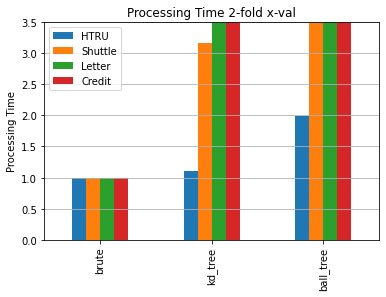

In [10]:
ax = xv2res.T.plot(kind ='bar')
ax.set_ylabel("Processing Time")
ax.set_title("Processing Time 2-fold x-val")
ax.set_ylim(0,3.5)
ax.grid('on', which='major', axis='y')

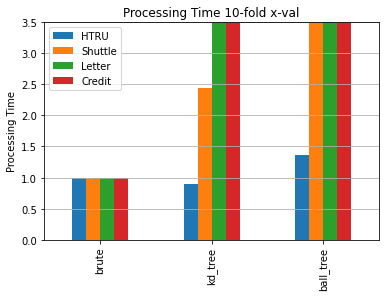

In [11]:
ax = xv10res.T.plot(kind ='bar')
ax.set_ylabel("Processing Time")
ax.set_title("Processing Time 10-fold x-val")
ax.set_ylim(0,3.5)
ax.grid('on', which='major', axis='y')